In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv") 
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##  Problem Statement

The goal of this analysis is to explore customer demographics and behavior, then apply both **supervised** and **unsupervised** machine learning techniques to:

1. Segment customers into distinct groups using **clustering** (unsupervised learning).
2. Predict the **Spending Score** based on other features (supervised learning).

This analysis will help businesses better understand customer types and target them with personalized marketing strategies.

---

##  Dataset Overview

- **CustomerID**: Unique identifier for each customer.
- **Gender**: Gender of the customer (Male/Female).
- **Age**: Age of the customer.
- **Annual Income (k$)**: Annual income in thousands.
- **Spending Score (1–100)**: Score assigned by the mall based on spending behavior and income.


In [3]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


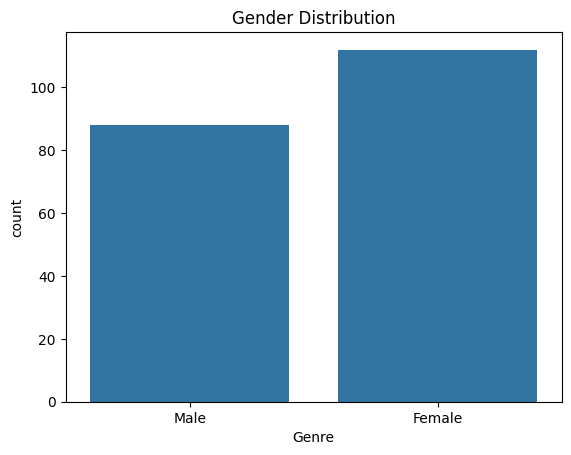

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Genre", data=df)
plt.title("Gender Distribution")
plt.show()

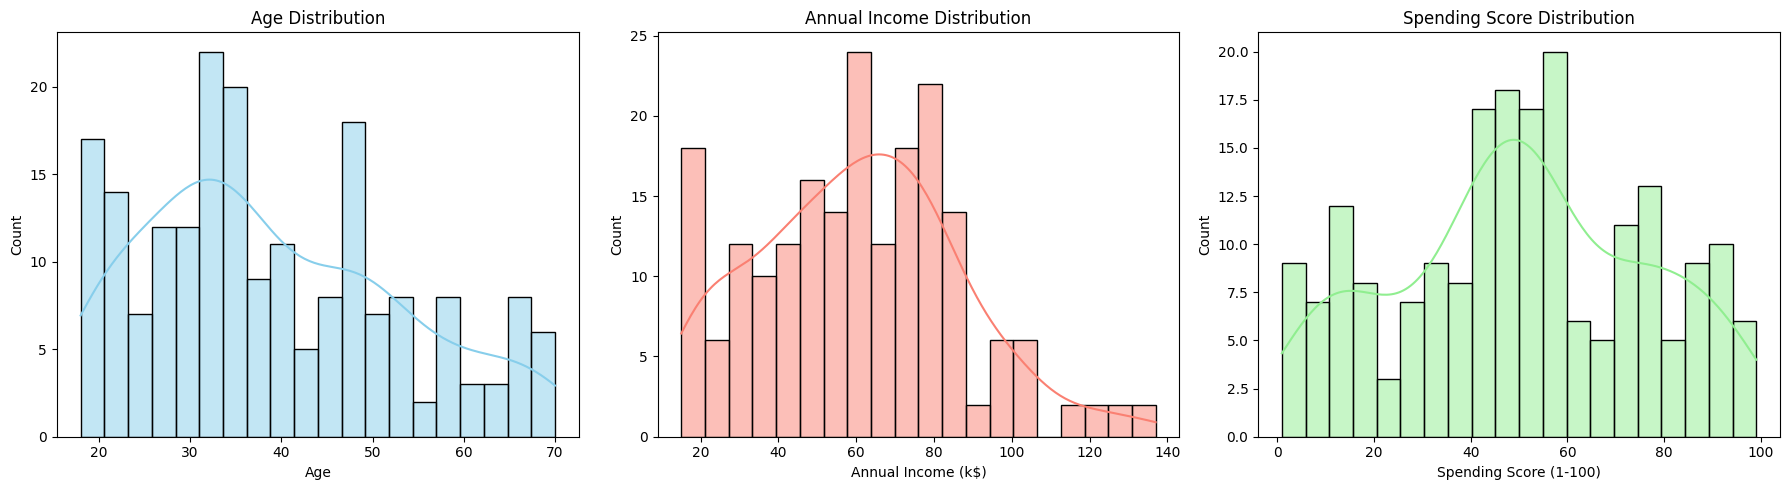

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Age Distribution")

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Annual Income Distribution")

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title("Spending Score Distribution")

plt.tight_layout()
plt.show()

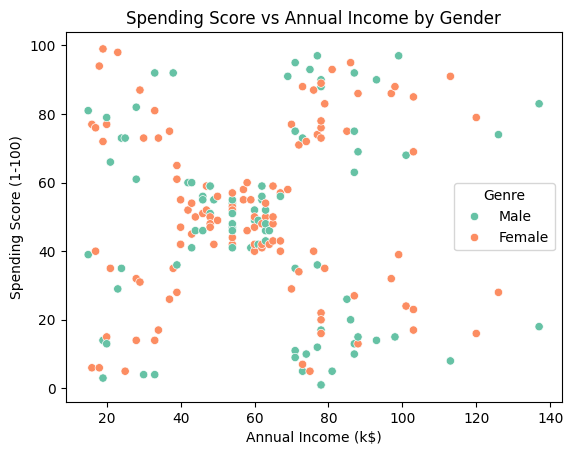

In [7]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette='Set2')
plt.title('Spending Score vs Annual Income by Gender')
plt.show()

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

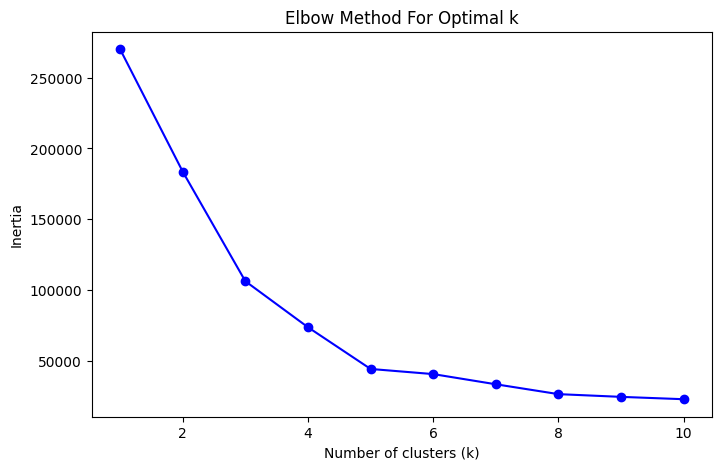

In [9]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

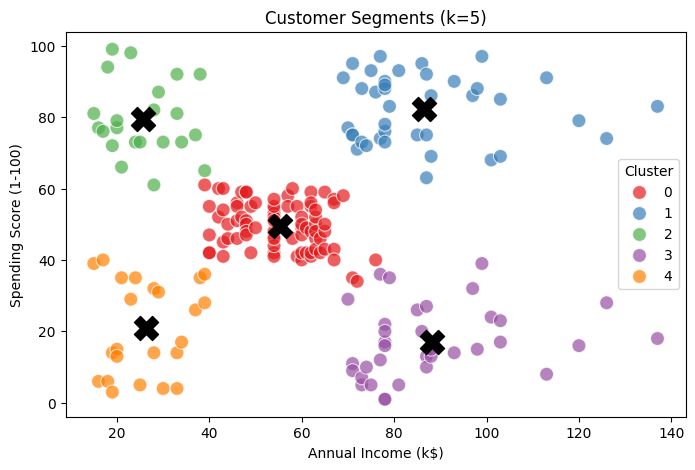

In [15]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X')  # cluster centers
plt.title(f'Customer Segments (k={k})')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])  # female=0, male=1 (or vice versa)

X_supervised = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y_supervised = df['Genre_encoded']

# Split data 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=42)


In [12]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

      Female       0.62      0.76      0.68        21
        Male       0.64      0.47      0.55        19

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.61        40
weighted avg       0.63      0.62      0.62        40



## Exploratory Data Analysis (EDA)

- Age mostly falls between 20 and 50 years, peaking around 30–40 years.
- Annual Income ranges from 15k$ to 137k$, with most customers earning between 60k$ and 80k$.
- Spending Score varies widely, centered roughly between 40 and 60.
- Gender distribution shows slightly more females than males.

Visualizations:
- Histograms for Age, Income, and Spending Score showed data distributions.
- Scatter plots revealed no clear linear relation between Annual Income and Spending Score.
- Elbow method was used to determine the optimal number of clusters for KMeans clustering.
- KMeans clustering segmented customers into meaningful groups based on income and spending score.


## Model Building

Two modeling techniques were applied:

- **Unsupervised Learning:** KMeans clustering was performed to segment customers into 5 clusters based on Annual Income and Spending Score.
- **Supervised Learning:** A Random Forest classifier was trained to predict Gender using Age, Annual Income, and Spending Score.

Model training and evaluation were done using train-test split.


## Evaluation

- The KMeans clustering showed clear groups of customers based on spending behavior and income, useful for marketing segmentation.
- The Random Forest classifier achieved an accuracy of approximately 62.5% in predicting gender, indicating moderate predictive power based on the selected features.
- Precision, recall, and F1-scores for both classes were analyzed, highlighting areas for improvement.

Limitations:
- The dataset is relatively small.
- Features may not fully capture gender differences.
- Model tuning and feature engineering could improve classification results.

Future work could include adding more features and testing different models to enhance prediction performance.
